## Dependencias

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from ipywidgets import widgets

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

cf.go_offline()

## Lectura de datos

In [2]:
import os
path = os.getcwd()[:-38]+"Data/Medidas_Antropometricas.xlsx"
path

'/Users/jesusarredondo/Documents/Diplomado/Modulo3/Data/Medidas_Antropometricas.xlsx'

In [3]:
df = pd.read_excel(path).dropna().reset_index(drop=True) #quitamos nulos

In [4]:
df.shape,df.dropna().shape

((35, 5), (35, 5))

In [5]:
df.head()

,Edad,Estatura,Zapato,Num_Hijos,Num_Hermanos
0,33,174,27.5,0,2
1,27,178,28.0,0,1
2,25,186,27.5,0,1
3,24,171,25.5,0,3
4,32,174,28.0,0,1


## Visualización

In [6]:
X = df.copy()

### Componentes Principales

In [7]:
pi = make_pipeline(StandardScaler(),PCA(n_components=3)) #Esa funcion con make_pipeline
Xp = pd.DataFrame(pi.fit_transform(X),columns=['d1','d2','d3'])
Xp.iplot(kind='scatter3d',x='d1',y='d2',z='d3',mode='markers',size=8) #graficamos en 3d

In [8]:
pi.steps[-1][-1].explained_variance_ratio_.cumsum() #Varianza explicada

array([0.54789376, 0.86167408, 0.94262549])

<AxesSubplot:xlabel='d1', ylabel='d2'>

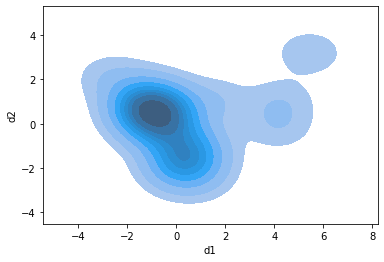

In [9]:
sns.kdeplot(data=Xp,x='d1',y='d2',fill=True)

### Escalamiento Multidimensional

In [10]:
#Usando mds
sc = MinMaxScaler()
mds = MDS(n_components=2,n_jobs=-1)
Xm = pd.DataFrame(sc.fit_transform(mds.fit_transform(X)),columns=['d1','d2'])

Xm.iplot(kind='scatter',x='d1',y='d2',mode='markers',size=8)

In [11]:
tsne = TSNE(n_components=2)
Xt = pd.DataFrame(sc.transform(tsne.fit_transform(X)),columns=['d1','d2'])
Xt.iplot(kind='scatter',x='d1',y='d2',mode='markers',size=8)

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<AxesSubplot:xlabel='d1', ylabel='d2'>

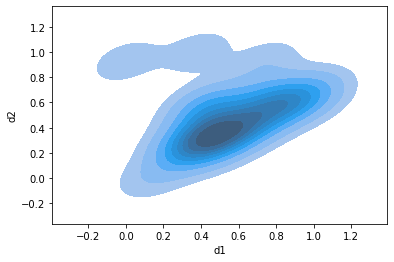

In [12]:
sns.kdeplot(data=Xm,x='d1',y='d2',fill=True)

## Selección del número de clusters

In [13]:
sc = MinMaxScaler()
Xs = pd.DataFrame(sc.fit_transform(X),columns=X.columns)
Xs.head()

,Edad,Estatura,Zapato,Num_Hijos,Num_Hermanos
0,0.323529,0.478261,0.642857,0.0,0.222222
1,0.147059,0.565217,0.714286,0.0,0.111111
2,0.088235,0.739130,0.642857,0.0,0.111111
3,0.058824,0.413043,0.357143,0.0,0.333333
4,0.294118,0.478261,0.714286,0.0,0.111111


### Inercia

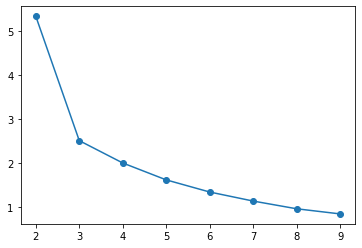

In [14]:
l = []
for k in range(2,10):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(Xs)
    l.append((k,km.inertia_))
inercia = pd.DataFrame(l,columns=['k','inercia'])

plt.plot(inercia['k'],inercia['inercia'],marker='o')

### Silueta

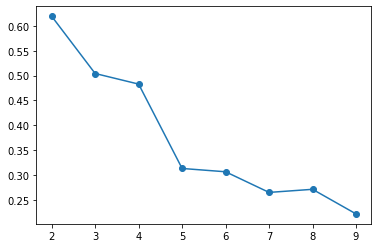

In [15]:
l = []
for k in range(2,10):
    km = KMeans(n_clusters=k,max_iter=100)
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
inercia = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(inercia['k'],inercia['silueta'],marker='o')

## Clustering

In [16]:
k = 3
km = KMeans(n_clusters=k,max_iter=100)

In [17]:
km.fit(Xs)

KMeans(max_iter=100, n_clusters=3)

In [18]:
Xs['cl'] = df['cl'] = X['cl'] = Xp['cl']  = Xm['cl']  = Xt['cl'] = km.predict(Xs)

In [19]:
Xp['cl'] = Xp['cl'].astype(str) #Se pone como string
Xm['cl'] = Xm['cl'].astype(str)
Xt['cl'] = Xt['cl'].astype(str)

## Visualización después de clustering

In [20]:
Xp.iplot(kind='scatter',x='d1',y='d2',mode='markers',size=8,categories='cl')
Xm.iplot(kind='scatter',x='d1',y='d2',mode='markers',size=8,categories='cl')
Xt.iplot(kind='scatter',x='d1',y='d2',mode='markers',size=8,categories='cl')
#tsne no funciona tambien

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/cufflinks/plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.

/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/cufflinks/plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.



/Users/jesusarredondo/Documents/Diplomado/Modulo3/mod3/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning:

No contour levels were found within the data range.



<AxesSubplot:xlabel='d1', ylabel='d2'>

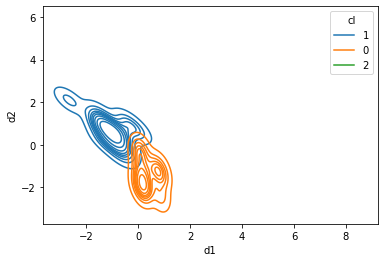

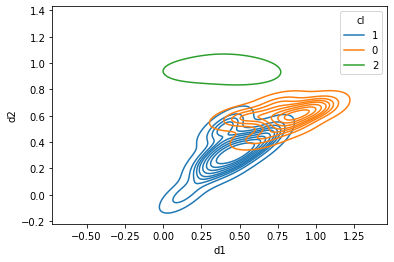

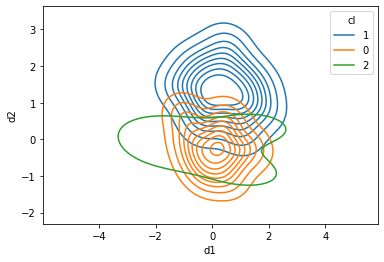

In [21]:
#Grafica de densidades
plt.figure()
sns.kdeplot(data=Xp,x='d1',y='d2',fill=False,hue='cl')
plt.figure()
sns.kdeplot(data=Xm,x='d1',y='d2',fill=False,hue='cl')
plt.figure()
sns.kdeplot(data=Xt,x='d1',y='d2',fill=False,hue='cl')

## Ejemplos

In [22]:
df.groupby(by='cl').agg(['mean']) #Perfilamiento, la unidad muestral son personas

,Edad,Estatura,Zapato,Num_Hijos,Num_Hermanos
,mean,mean,mean,mean,mean
cl,,,,,
0,25.833333,161.500000,24.416667,0.0,1.750000
1,25.210526,179.157895,27.815789,0.0,1.421053
2,44.750000,163.250000,25.500000,2.0,4.750000


In [23]:
df.loc[df['cl']==2]

,Edad,Estatura,Zapato,Num_Hijos,Num_Hermanos,cl
6,56,171,26.5,2,9,2
13,50,159,25.0,2,4,2
15,38,152,24.0,2,5,2
22,35,171,26.5,2,1,2


In [24]:
df.loc[df['cl']==1]

,Edad,Estatura,Zapato,Num_Hijos,Num_Hermanos,cl
0,33,174,27.5,0,2,1
1,27,178,28.0,0,1,1
2,25,186,27.5,0,1,1
4,32,174,28.0,0,1,1
7,23,176,27.0,0,1,1
8,23,198,30.0,0,0,1
9,26,175,27.0,0,1,1
11,23,170,27.0,0,2,1
12,27,180,28.0,0,1,1
14,23,173,29.5,0,1,1


In [25]:
df.loc[df['cl']==0]

,Edad,Estatura,Zapato,Num_Hijos,Num_Hermanos,cl
3,24,171,25.5,0,3,0
5,23,156,24.0,0,1,0
10,23,155,25.0,0,1,0
19,30,159,24.0,0,2,0
20,24,153,23.0,0,2,0
23,33,169,26.0,0,1,0
24,25,160,24.0,0,1,0
25,27,162,24.5,0,1,0
27,23,164,24.0,0,4,0
28,24,162,25.5,0,2,0
